In [ ]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from graph_tool.all import *

#g = g=graph_tool.load_graph_from_csv("file.csv", directed=False, eprop_types=None,
#                        eprop_names=None, hashed=True, 
#                        skip_first=False,  ecols=(0,1),
#                        csv_options={"delimiter": ",", "quotechar": '"'})

g = collection.data["karate"]

lcc = local_clustering(g)
cmap = plt.get_cmap('autumn')
print(cmap)
norm = plt.Normalize(0, max(lcc))
node_colors = [cmap(norm(lcc[node])) for node in g.vertices()]
print(node_colors)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
graph_draw(g, pos = random_layout(g), vertex_text=g.vertex_index, vertex_color=node_colors, vertex_fill_color=node_colors)
fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), label='Clustering', shrink=0.95, ax=ax1)

#ax2.hist(lcc, bins=10)
#ax2.set_xlabel('Clustering')
#ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import networkx as nx

g = nx.erdos_renyi_graph(50, 0.1, seed=None, directed=False)
gc = g.subgraph(max(nx.connected_components(g)))
lcc = nx.clustering(gc)

cmap = plt.get_cmap('autumn')(
norm = plt.Normalize(0, max(lcc.values()))
node_colors = [cmap(norm(lcc[node])) for node in gc.nodes]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
nx.draw_spring(gc, node_color=node_colors, with_labels=True, ax=ax1)
fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), label='Clustering', shrink=0.95, ax=ax1)

ax2.hist(lcc.values(), bins=10)
ax2.set_xlabel('Clustering')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [47]:
import warnings
warnings.filterwarnings("ignore")

from graph_tool.all import *
import graph_tool as gt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import matplotlib.pyplot as plt
import matplotlib.pyplot

In [44]:
g = graph_tool.load_graph_from_csv("Yeast-1_dream4_timeseries_2000.csv", directed=False, eprop_types=None,
                        eprop_names=None, hashed=True, 
                        skip_first=False,  ecols=(0,1),
                        csv_options={"delimiter": ",", "quotechar": '"'})


In [48]:
g = collection.data["karate"]
clust = local_clustering(g)
#print(gt.vertex_average(g, clust))
print(type(clust))

<class 'graph_tool.VertexPropertyMap'>


In [49]:
dict = {}

prop = g.new_vertex_property("vector<double>")
prop = clust
x = np.array(prop.a); # numpy nd array
x = np.around(np.array(x),2) # limiting the precision
s = list((set(x)))

for i in g.vertices():
    dict[i] = x[int(i)]

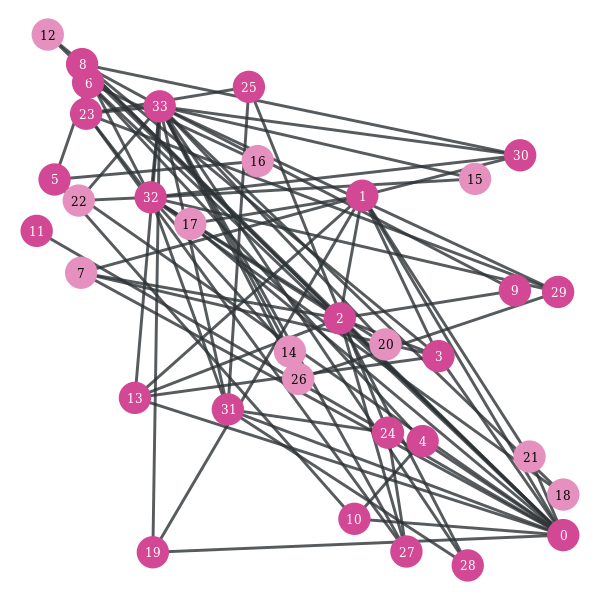

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fa490250100, at 0x7fa448d2e640>

In [50]:
cmap = plt.get_cmap('PiYG')
norm = plt.Normalize(0, max(clust))
coeff_colors = [cmap(norm(i)) for i in s]

coeff_colors = list(map(list, coeff_colors))
clr = g.new_vertex_property("vector<double>")

for i in s:
    for j in g.vertices():
        if i == dict[int(j)]:
            clr[j] = coeff_colors[int(i)]

graph_draw(g, pos = random_layout(g), vertex_text=g.vertex_index,#name,
              vertex_color=clr, vertex_fill_color=clr,
              vcmap=matplotlib.cm.inferno)

In [ ]:
node_color = g.new_vertex_property("vector<double>")

for i in range(len(s)):
    node_color = plt.plot(s[i], label=s[i])
#plt.legend(loc='best')
#plt.show()

